In [6]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [114]:
# Visualize data
def visualize_data(N, nu, threshold, shape_name):
    if shape_name == "Cube":
        shape_name_str = "Cube\\x2_widths"
        N_str = str(N)
        width = 2*N
    elif shape_name == "RDG4":
        shape_name_str = "RDG_square_int"
        N_str = f"{int(1.5*N)}x{int(1.5*N)}x{N}"
        width = int(1.5*N)
    elif shape_name == "RDG6":
        shape_name_str = "RDG_hex_int"
        N_str = str(N)

    filename_strike = f"C:\\Users\\gabriel\\Desktop\\Capstone\\data\\{shape_name_str}\\{N_str}_{nu}_{threshold}_strikedata.txt"
    strike_file = open(filename_strike,'r')
    strike_data_str = strike_file.read()
    strike_data_str = strike_data_str.split('#')[:-1]

    strike_data = np.zeros((width, width))
    print("Datapoints:",len(strike_data_str))

    for point in strike_data_str:
        point = point.split(',')
        x_coord = ...
        y_coord = ...
        if shape_name == "Cube":
            x_coord = point[1]
            y_coord = point[2]
        elif shape_name == "RDG4" or shape_name == "RDG6":
            x_coord = point[0]
            y_coord = point[1]
        x_coord = x_coord.strip()
        if shape_name == "RDG4" or shape_name == "RDG6":
            x_coord = x_coord.strip('(')
            x_coord = x_coord.strip()
        y_coord = y_coord.strip()
        y_coord = y_coord.strip(')')
        strike_data[int(x_coord), int(y_coord)] += 1

    cmap = matplotlib.cm.viridis
    fig = plt.figure(figsize=(18,12))
    plt.imshow(strike_data, cmap=cmap)
    plt.colorbar()
    plt.show()

In [106]:
# Variance of 2D data
def calc_variance(N, nu, threshold, shape_name, print_output=False):
    if shape_name == "Cube":
        shape_name_str = "Cube\\x2_widths"
        N_str = str(N)
    elif shape_name == "RDG4":
        shape_name_str = "RDG_square_int"
        N_str = f"{int(1.5*N)}x{int(1.5*N)}x{N}"
    elif shape_name == "RDG6":
        shape_name_str = "RDG_hex_int"
        N_str = str(N)

    print(shape_name)
    filename_strike = f"C:\\Users\\gabriel\\Desktop\\Capstone\\data\\{shape_name_str}\\{N_str}_{nu}_{threshold}_strikedata.txt"
    strike_file = open(filename_strike,'r')
    strike_data_str = strike_file.read()
    strike_data_str = strike_data_str.split('#')[:-1]

    strike_data = np.zeros((N*2, N*2))

    for point in strike_data_str:
        point = point.split(',')
        if shape_name == "Cube":
            x_coord = point[1]
            y_coord = point[2]
        elif shape_name == "RDG4" or shape_name == "RDG6":
            x_coord = point[0]
            y_coord = point[1]
        x_coord = x_coord.strip()
        if shape_name == "RDG4" or shape_name == "RDG6":
            x_coord = y_coord.strip('(')
        y_coord = y_coord.strip()
        y_coord = y_coord.strip(')')
        strike_data[int(x_coord), int(y_coord)] += 1
    
    
    x_indices, y_indices = np.nonzero(strike_data)

    mean_x_pos = np.mean(x_indices)
    mean_y_pos = np.mean(y_indices)
    var_x_pos = np.var(x_indices)
    var_y_pos = np.var(y_indices)

    # Overall variance
    total_variance = 0
    for x in range(N*2):
        for y in range(N*2):
            total_variance += strike_data[x,y]*((x - mean_x_pos)**2 + (y - mean_y_pos)**2)

    total_variance /= np.sum(strike_data)

    if print_output:
        print("Datapoints:", len(strike_data_str))
        print(f"Mean x-pos: {mean_x_pos}")
        print(f"Mean y-pos: {mean_y_pos}")
        print(f"Var x-pos: {var_x_pos}")
        print(f"Var y-pos: {var_y_pos}")
        print(f"Overall variance: {total_variance}")
    
    return total_variance, var_x_pos, var_y_pos, mean_x_pos, mean_y_pos

Datapoints: 1295


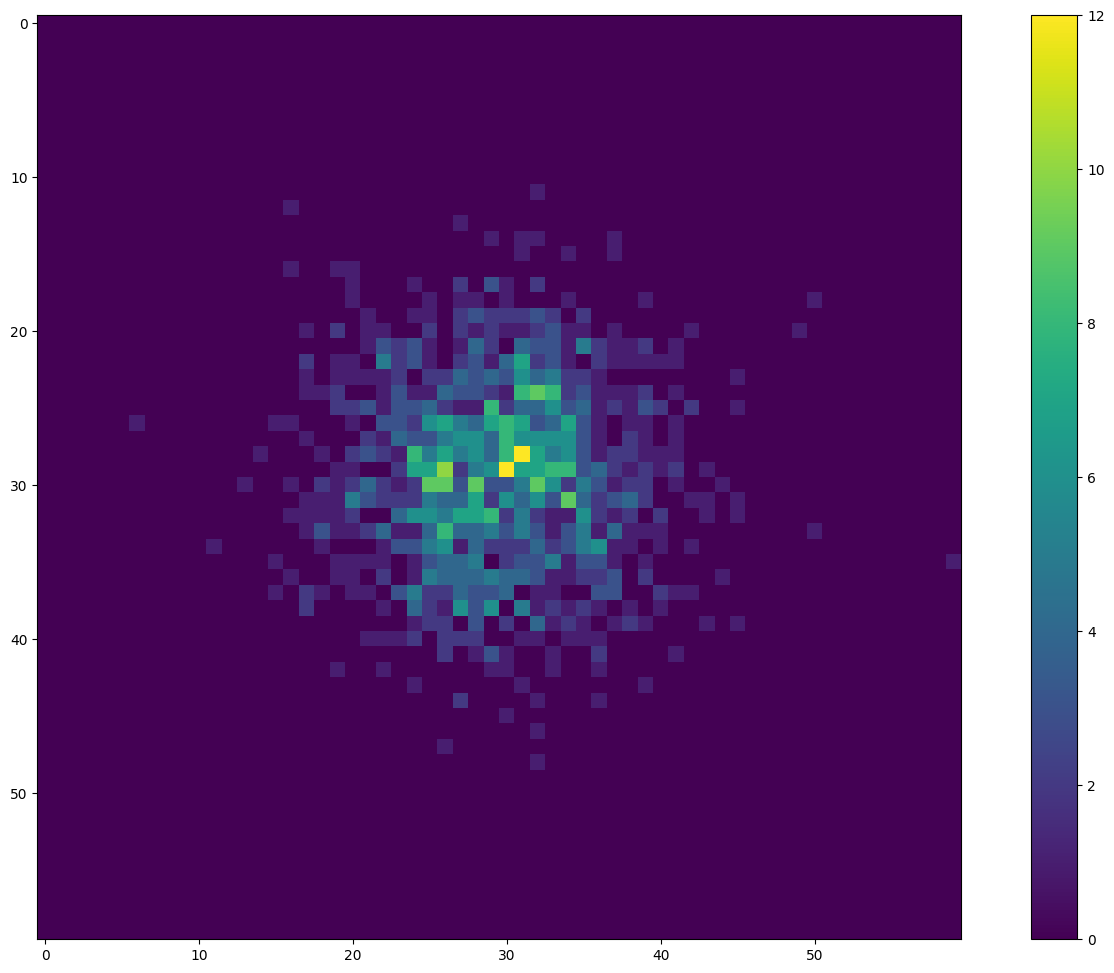

In [115]:
visualize_data(40, 6, 0.001, "RDG4")

In [48]:
calc_variance(40, 2.5, 0.001, "Cube")
print()
calc_variance(40, 6, 0.001, "Cube")
print()
calc_variance(30, 2.5, 0.001, "Cube")
print()
calc_variance(30, 6, 0.001, "Cube")

(np.float64(18.879180507028153),
 np.float64(19.515898334063095),
 np.float64(23.294802026646646),
 np.float64(29.990867579908677),
 np.float64(30.273972602739725))

Datapoints: 2671


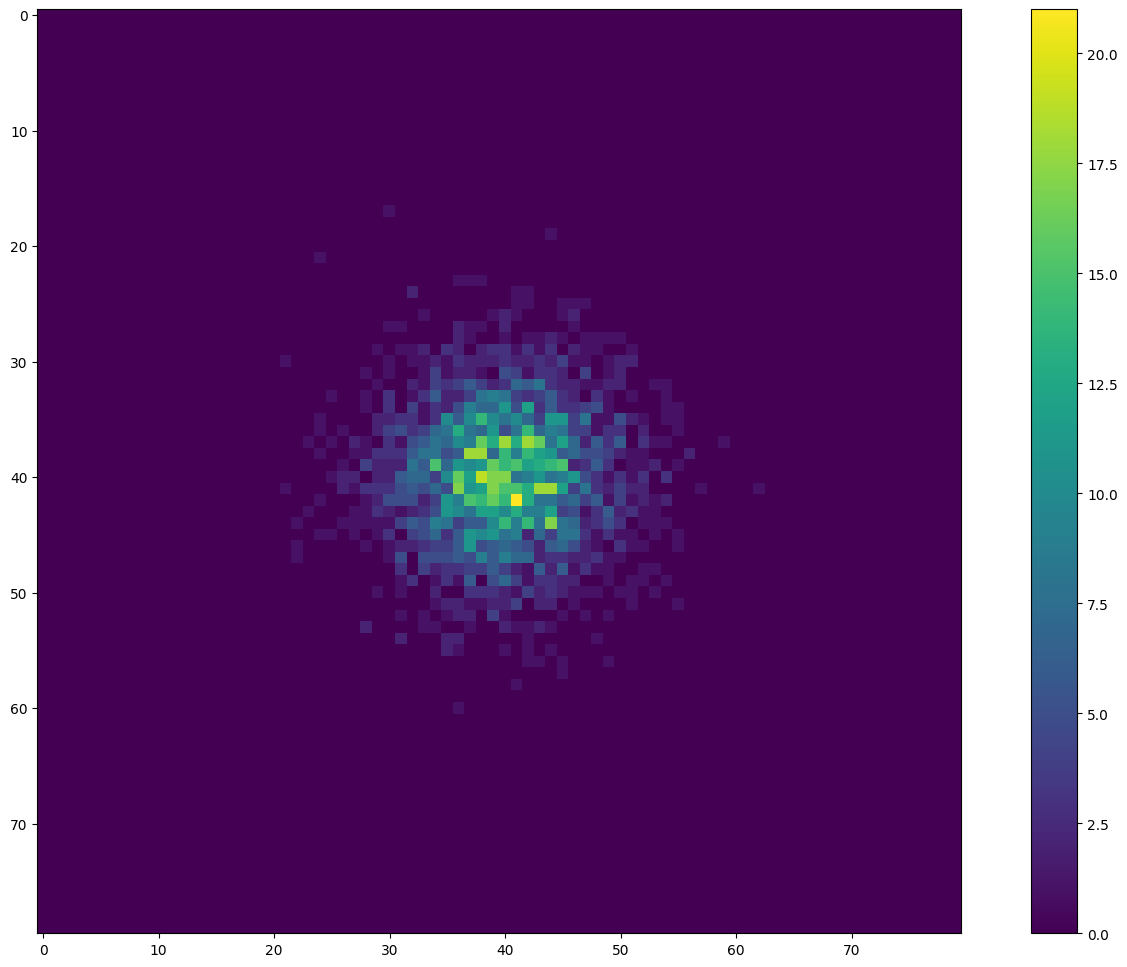

Datapoints: 2130


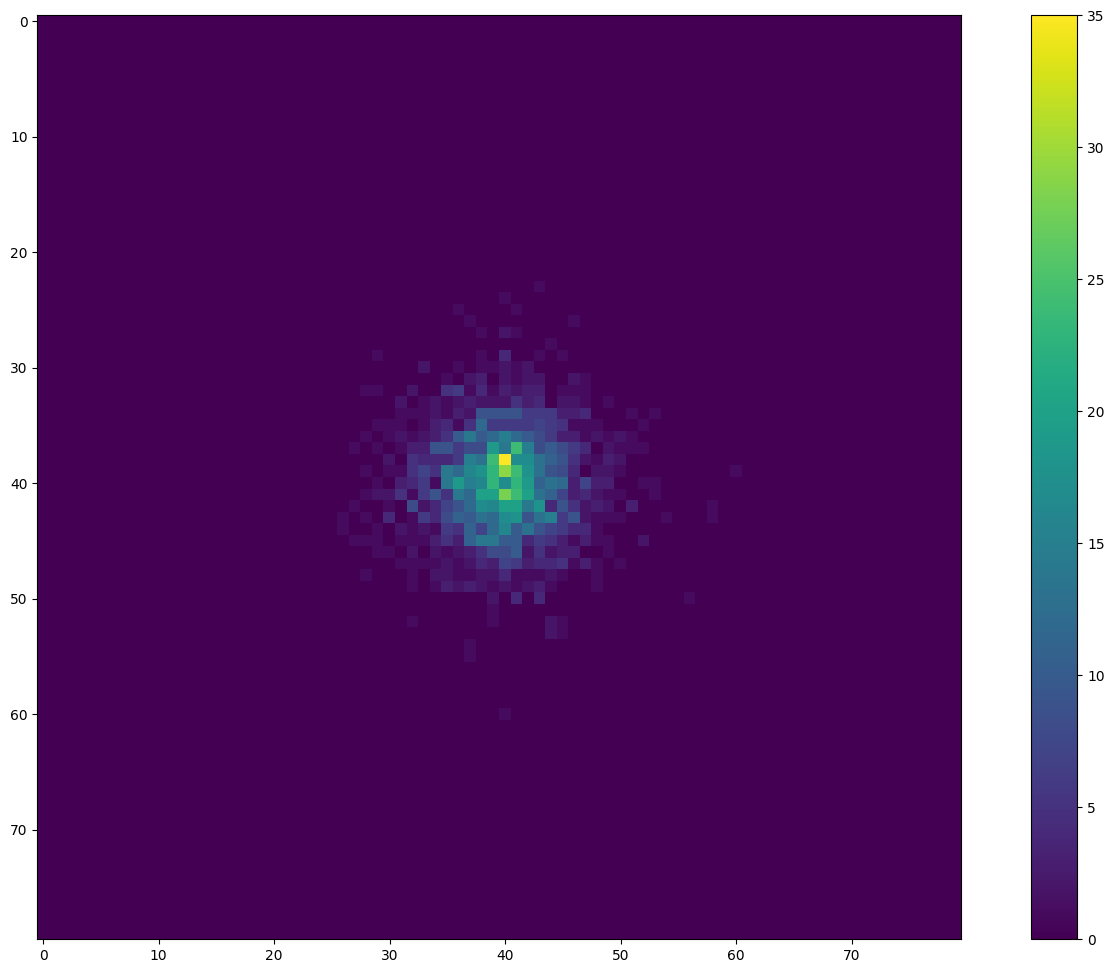

Datapoints: 1156


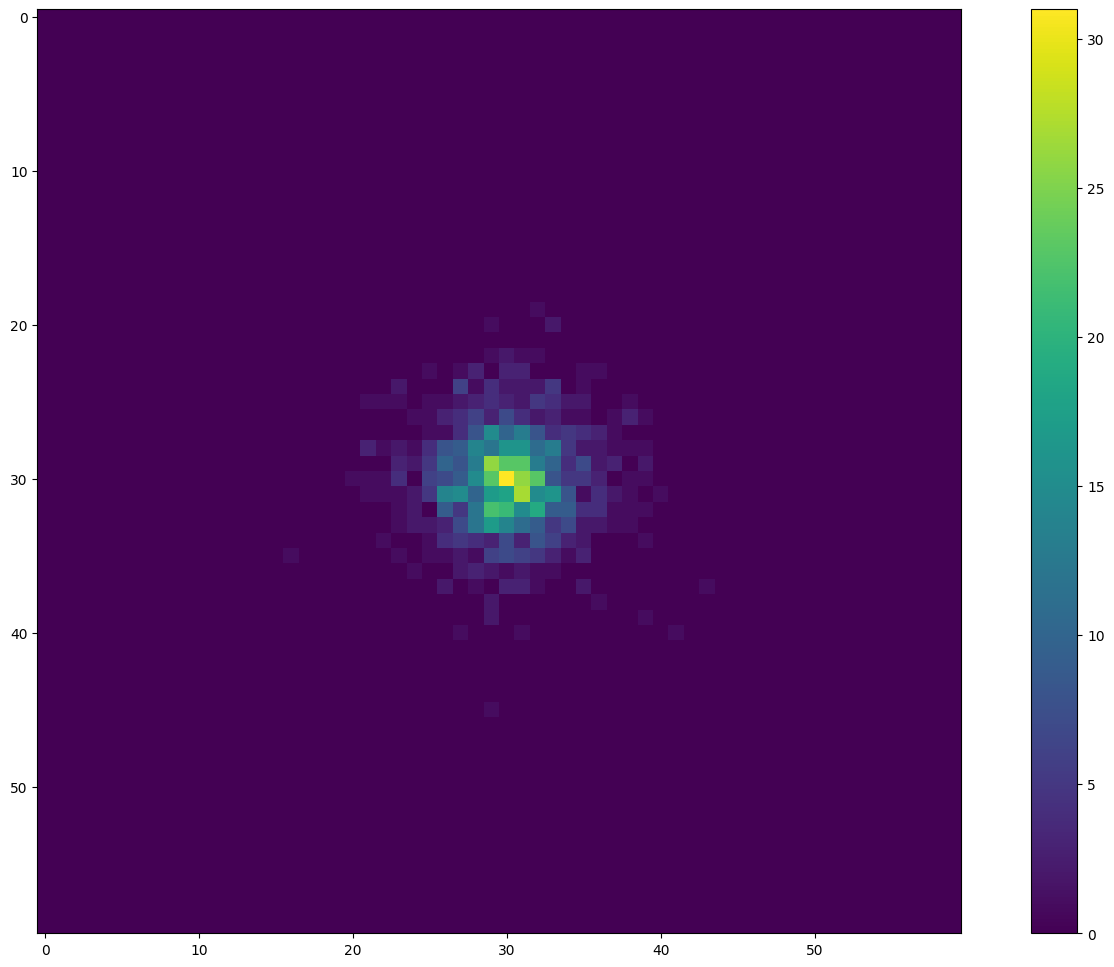

In [43]:
visualize_data(40, 2.5, 0.001, "Cube")
visualize_data(40, 6, 0.001, "Cube")
visualize_data(30, 6, 0.001, "Cube")